In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
# Biblioteca para fazer a PADRONIZAÇÃO
from sklearn.preprocessing import StandardScaler
# Biblioteca para fazer a NORMALIZAÇÃO
from sklearn.preprocessing import MinMaxScaler
# Bilioteca para separação de dados em treino e teste
from sklearn.model_selection import train_test_split
# Biblioteca para calcular a acuracia do modelo
from sklearn.metrics import accuracy_score
# Algoritmo KNN
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm

In [2]:

# Carregando o arquivo
df_original = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data", sep = ",")
# Nomeando as colunas
df_original.columns = ['CLASS','ALCOHOL','MALICACID','ASH','ASHALCALINITY','MAGNESIUM','TOTALPHENOLS','FLAVONOIDS',
                      'NONFLAVONOIDSPHENOLS','PRONTHOCYANINS','COLORINTENSITY','HUE','OD280_OD315','PROLINE']
# Visualizando as primeiras linhas do DataFrame
df_original.head()


,CLASS,ALCOHOL,MALICACID,ASH,ASHALCALINITY,MAGNESIUM,TOTALPHENOLS,FLAVONOIDS,NONFLAVONOIDSPHENOLS,PRONTHOCYANINS,COLORINTENSITY,HUE,OD280_OD315,PROLINE
0,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
1,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
2,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
3,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
4,1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450


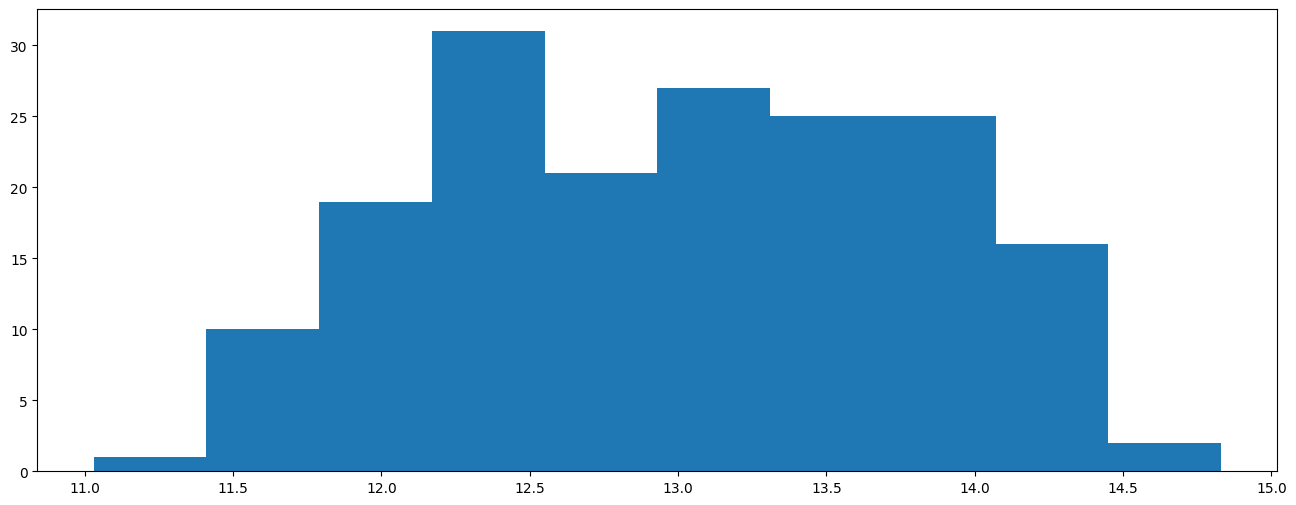

In [3]:
#Verificando Nulos
df_original.isna().sum()
plt.figure(figsize=(16,6))
graf = plt.hist(df_original['ALCOHOL'])

Text(0.5, 1.0, 'Alcohol Content vs Wine Class')

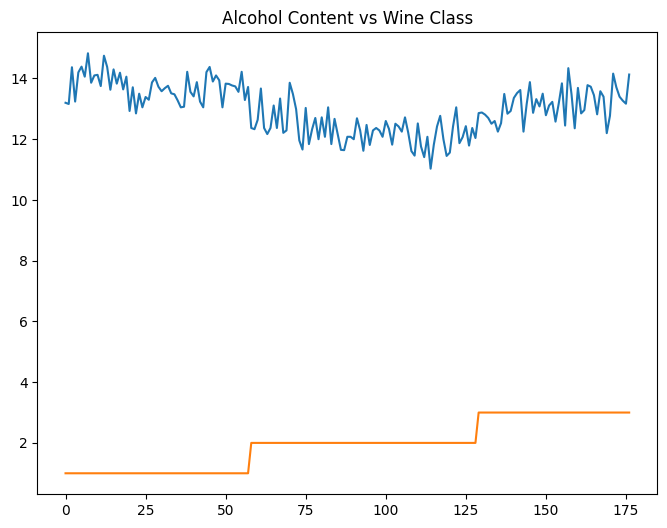

In [4]:
# @ Alcohol vs Wine Class
df_clone = df_original[['ALCOHOL','CLASS']]
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
plt.plot(df_clone)
plt.title('Alcohol Content vs Wine Class')

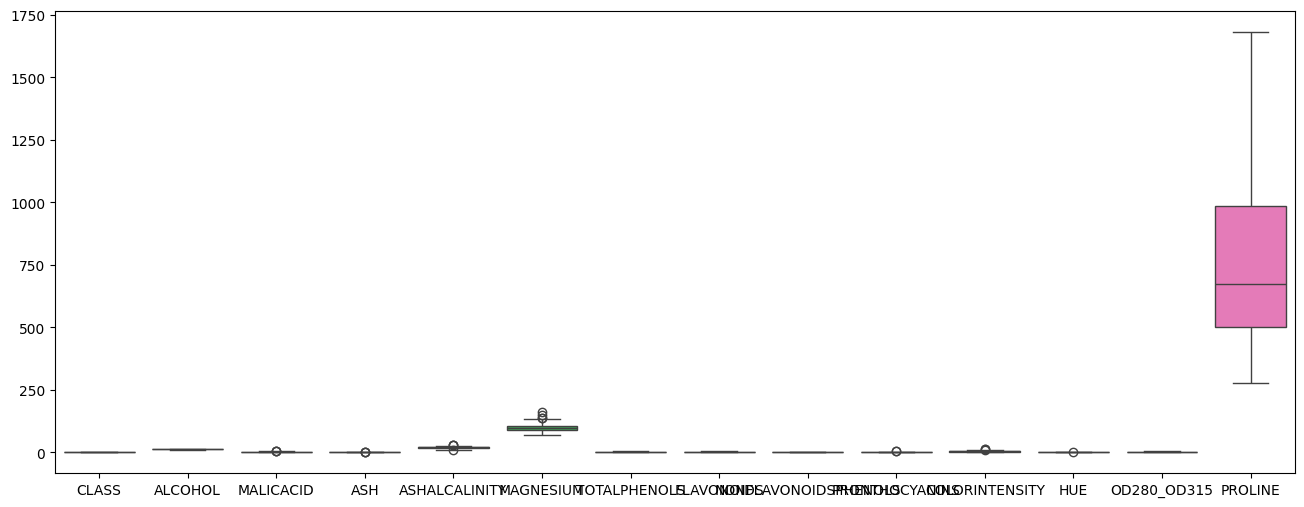

In [5]:
plt.figure(figsize=(16,6))
ax = sns.boxplot(data = df_original)

In [7]:
#CRIANDO UM OBJ  para a padronizacao dos dados
object_padronizacao = StandardScaler().fit(df_original)

In [12]:
df_padronizado = object_padronizacao.transform(df_original)

In [13]:
df_padronizado

array([[-1.22246766,  0.2558245 , -0.50162433, ...,  0.40709978,
         1.13169801,  0.97105248],
       [-1.22246766,  0.20622873,  0.01802001, ...,  0.3195674 ,
         0.80457911,  1.40099798],
       [-1.22246766,  1.70650069, -0.34931478, ..., -0.4244579 ,
         1.20281081,  2.34050852],
       ...,
       [ 1.36887097,  0.34261709,  1.73822194, ..., -1.60614514,
        -1.48525319,  0.28632445],
       [ 1.36887097,  0.21862767,  0.22408586, ..., -1.56237895,
        -1.39991783,  0.30224836],
       [ 1.36887097,  1.40892609,  1.57695301, ..., -1.51861275,
        -1.42836295, -0.58949046]])

In [14]:
df_padronizado = pd.DataFrame(df_padronizado)

In [15]:
df_padronizado.columns = ['CLASS','ALCOHOL','MALICACID','ASH','ASHALCALINITY','MAGNESIUM','TOTALPHENOLS','FLAVONOIDS',
                      'NONFLAVONOIDSPHENOLS','PRONTHOCYANINS','COLORINTENSITY','HUE','OD280_OD315','PROLINE']


In [16]:
df_padronizado

,CLASS,ALCOHOL,MALICACID,ASH,ASHALCALINITY,MAGNESIUM,TOTALPHENOLS,FLAVONOIDS,NONFLAVONOIDSPHENOLS,PRONTHOCYANINS,COLORINTENSITY,HUE,OD280_OD315,PROLINE
0,-1.222468,0.255824,-0.501624,-0.824485,-2.500110,0.029180,0.572666,0.739636,-0.823139,-0.538575,-0.291130,0.407100,1.131698,0.971052
1,-1.222468,0.206229,0.018020,1.107690,-0.275639,0.099932,0.812784,1.221645,-0.501337,2.145975,0.269729,0.319567,0.804579,1.400998
2,-1.222468,1.706501,-0.349315,0.487935,-0.816726,0.948953,2.493609,1.472691,-0.984039,1.040572,1.184362,-0.424458,1.202811,2.340509
3,-1.222468,0.305420,0.224086,1.836812,0.445811,1.302712,0.812784,0.669343,0.222716,0.408913,-0.317016,0.363334,0.463238,-0.032154
4,-1.222468,1.495719,-0.519543,0.305655,-1.297693,0.878201,1.565153,1.372273,-0.179536,0.672104,0.731360,0.407100,0.349457,2.244965
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172,1.368871,0.888171,2.965658,0.305655,0.295509,-0.324579,-0.980097,-1.419361,1.268570,-0.924589,1.141219,-1.387314,-1.229247,-0.016230
173,1.368871,0.503803,1.406725,0.415023,1.047020,0.170684,-0.788003,-1.278776,0.544517,-0.310476,0.968647,-1.124717,-1.485253,0.015618
174,1.368871,0.342617,1.738222,-0.387012,0.145207,1.444215,-1.124168,-1.339027,0.544517,-0.415753,2.219795,-1.606145,-1.485253,0.286324
175,1.368871,0.218628,0.224086,0.014006,0.145207,1.444215,-1.028121,-1.349068,1.349020,-0.222746,1.831507,-1.562379,-1.399918,0.302248


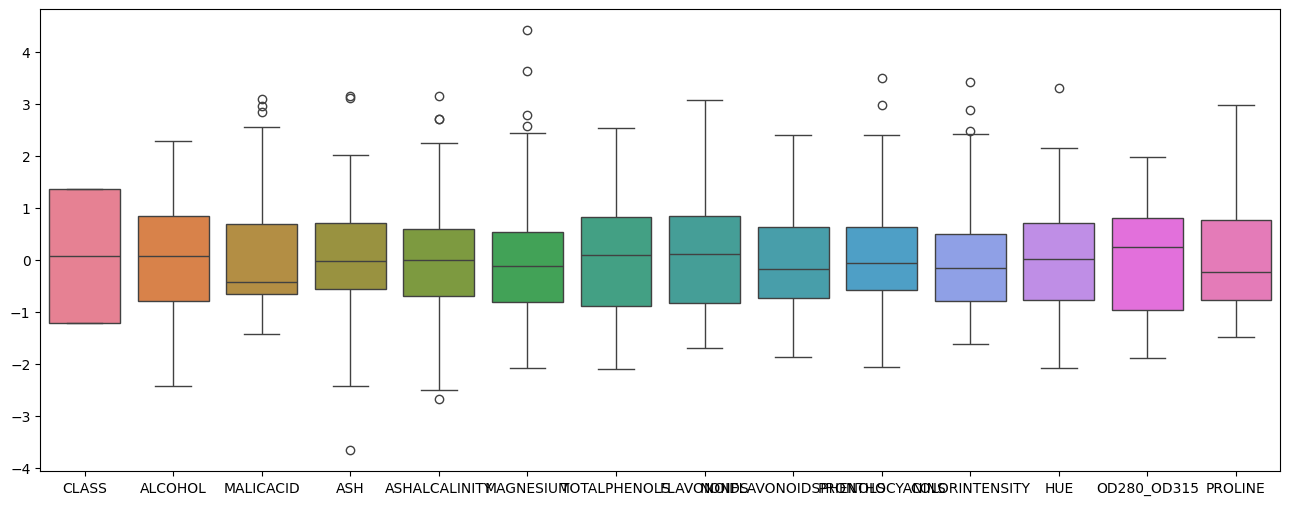

In [17]:
plt.figure(figsize=(16,6))
ax = sns.boxplot(data = df_padronizado)

# ------------------------------------------

In [35]:
#CRIANDO UM OBJ PARA A NORMALIZACAO DOS DADOS

obj_normalizacao = MinMaxScaler().fit(df_original)

In [36]:
df_normalizado =  obj_normalizacao.transform(df_original)

In [37]:
df_normalizado

array([[0.        , 0.57105263, 0.2055336 , ..., 0.46341463, 0.78021978,
        0.55064194],
       [0.        , 0.56052632, 0.3201581 , ..., 0.44715447, 0.6959707 ,
        0.64693295],
       [0.        , 0.87894737, 0.23913043, ..., 0.30894309, 0.7985348 ,
        0.85734665],
       ...,
       [1.        , 0.58947368, 0.69960474, ..., 0.08943089, 0.10622711,
        0.39728959],
       [1.        , 0.56315789, 0.36561265, ..., 0.09756098, 0.12820513,
        0.40085592],
       [1.        , 0.81578947, 0.66403162, ..., 0.10569106, 0.12087912,
        0.20114123]])

In [38]:
df_normalizado = pd.DataFrame(df_normalizado)

In [39]:
df_normalizado.columns = ['CLASS','ALCOHOL','MALICACID','ASH','ASHALCALINITY','MAGNESIUM','TOTALPHENOLS','FLAVONOIDS',
                      'NONFLAVONOIDSPHENOLS','PRONTHOCYANINS','COLORINTENSITY','HUE','OD280_OD315','PROLINE']


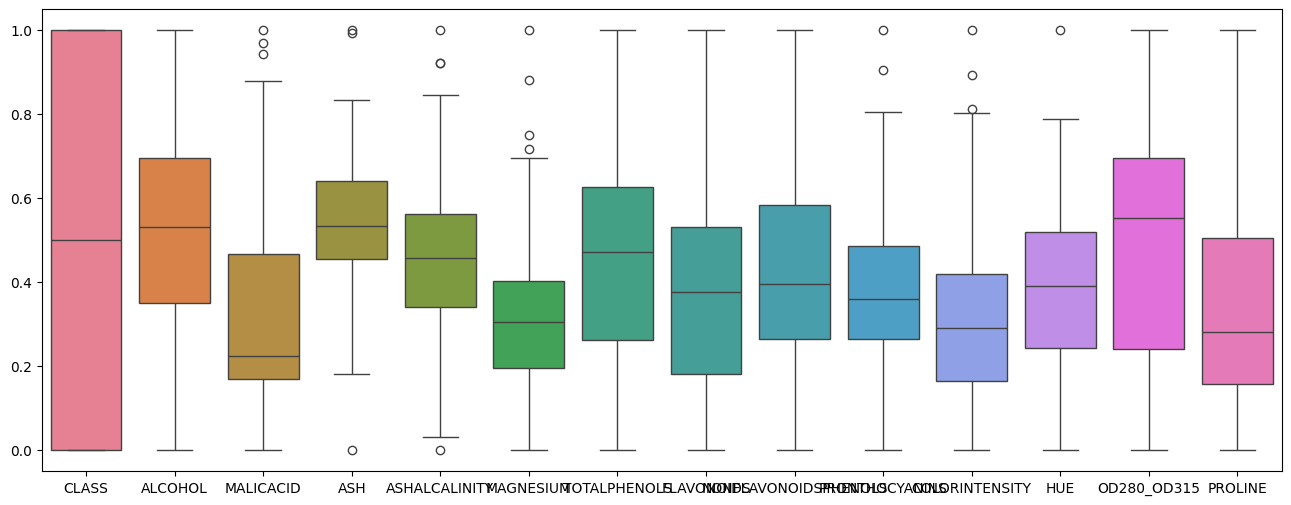

In [40]:
plt.figure(figsize=(16,6))
ax = sns.boxplot(data = df_normalizado)

In [43]:
#ALGORITMOO KNN

VAR_PREDITORAS_ORIG = df_original.drop ('CLASS', axis= 1)

In [44]:
VAR_TARGET = df_original['CLASS']

In [47]:
X_train, X_test, y_train,y_test = train_test_split (VAR_PREDITORAS_ORIG, VAR_TARGET, test_size=0.3,random_state= 42)

In [48]:
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [50]:
resultados = knn.predict(X_test)

In [51]:
score = accuracy_score(y_test, resultados)
print(score)

0.7037037037037037


In [54]:
# VARIAVEIS PREDITORAS X POREM AGORA PADRONIZADAS 
VAR_PREDITORAS_PAD = df_original.drop ('CLASS', axis = 1 )

In [55]:
VAR_TARGET= df_original['CLASS']

In [56]:
X_train, X_test, y_train,y_test = train_test_split (VAR_PREDITORAS_PAD, VAR_TARGET, test_size=0.3,random_state= 42)

In [57]:
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [58]:
resultados2 = knn.predict(X_test)


In [62]:
score_PAD = accuracy_score(y_test, resultados2)
print(score_PAD)

0.7037037037037037


In [61]:
VAR_PREDITORAS_NORM = df_original.drop ('CLASS', axis = 1 )

In [63]:
VAR_TARGET= df_original['CLASS']

In [64]:
X_train, X_test, y_train,y_test = train_test_split (VAR_PREDITORAS_NORM, VAR_TARGET, test_size=0.3,random_state= 42)

In [65]:
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [66]:
resultados3 = knn.predict(X_test)


In [68]:
score_NORM = accuracy_score(y_test, resultados3)
print(score_NORM)

0.7037037037037037


# ------------------------------------------

In [69]:
# USANDO O ALGORITMO SVM 

VAR_PREDITORAS_ORIG = df_original.drop ('CLASS', axis= 1)


In [70]:
VAR_TARGET = df_original['CLASS']

In [ ]:
X_train, X_test, y_train,y_test = train_test_split (VAR_PREDITORAS_ORIG, VAR_TARGET, test_size=0.3,random_state= 42)

In [77]:
from sklearn.svm import SVC

svm = SVC(kernel='linear')
svm.fit(X_train,y_train)

SVC(kernel='linear')

In [75]:
resultadoSVM_ORIG = svm.predict(X_test)

In [78]:
score_resultadoSVM_ORIG = accuracy_score(y_test, resultadoSVM_ORIG)
print(score_resultadoSVM_ORIG)

0.9444444444444444


In [79]:
VAR_PREDITORAS_NORM_ORIG = df_normalizado.drop ('CLASS', axis= 1)

In [80]:
VAR_TARGET = df_original['CLASS']

In [81]:
X_train, X_test, y_train,y_test = train_test_split (VAR_PREDITORAS_NORM_ORIG, VAR_TARGET, test_size=0.3,random_state= 42)

In [82]:
from sklearn.svm import SVC

svm = SVC(kernel='linear')
svm.fit(X_train,y_train)

SVC(kernel='linear')

In [83]:
resultadoSVM_NORM_ORIG = svm.predict(X_test)

In [84]:
score_resultadoSVM_ORIG_NORM = accuracy_score(y_test, resultadoSVM_NORM_ORIG )
print(score_resultadoSVM_ORIG_NORM)

0.9444444444444444
